**AI-Lab**
---
**Search Algorithms - Assignment**
---
---
**Student Name:** *Mohammed Ashour*

**Student ID:** *1301195595*

---
**Mark: --/10**

Consider the following graph.

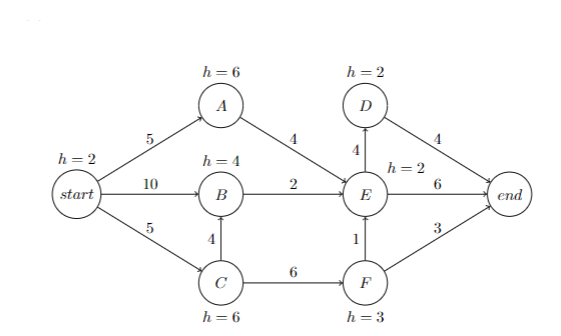

The successors of a node are each node it points to. Step costs are given on each edge. Heuristic values are given next to each node (ash=x). For each search strategy below, show the order in which nodes are expanded, with the start node as the start state and the end node as the goal state. Please end your paths with the goal node that is found, if any. Also, show the path from start to goal and its cost, or write None if no path is found. Assume the successor function returns states in alphabetic order, e.g. the children of the start are (A, B, C) and the children of A are (E), in that order. Consider “end” to be at the start of the alphabet, and “start” to be at the end of the alphabet.

(a) Breadth First Search

(b) Depth First Search

(c) Uniform Cost Search

(d) Greedy Search

(e) A* Search



In [2]:


#STD NAME: Mohammed Ashour
#STD ID: 1301195595

In [20]:
#breadth first search algorithm
from collections import deque as de

def breadth_first_search(graph, start, goal):
        found = False
        fringe = de([start])
        visited = set([start])
        came_from = {start: None}

        while not found and fringe:
            current = fringe.pop()
            if current == goal: 
              found = True
              break

            # print(current, end = " ")
              
            for node in neighbors(current):
                if node not in visited: 
                  visited.add(node)
                  fringe.appendleft(node)
                  came_from[node] = current  

        if found:
          print('Path:', end=' ') 
          print_path(came_from, goal)
        #print(); return came_from
        else: 
          print('No path from {} to {}'.format(start, goal))

def neighbors(node):
        try: return graph[node]
        except KeyError: return []

def print_path(came_from, goal):
        parent = came_from[goal]
        if parent:
          print_path(came_from, parent)
        else: print(goal, end='');return
        print(' =>', goal, end='')


graph = {
'start':['A','B','C'],
'A':['E'],
'B':['E'],
'C':['B','F'],
'D':['end'],
'E':['end','D'],

'F':['E','end']
,
}


start, goal = 'start', 'end'
print("final solution:")

breadth_first_search(graph, start, goal)

final solution:
Path: start => A => E => end

In [22]:
#Depth First Search
from collections import deque as de

def depth_first_search(graph, start, goal):
        found = False
        fringe = de([start])
        visited = set()
        came_from = {start: None}

        while not found and len(fringe): 
            current = fringe.pop()  

            # print(current, end = " ")            
            
            if current not in visited: 
              visited.add(current)
              fringe.extend(reversed(neighbors(current)))
            
            if current == goal:
              found = True
              break

            for node in neighbors(current):
              came_from[node] = current

        if found: 
          print('Path:', end=' ') 
          print_path(came_from, goal)
        else: 
          print('No path from {} to {}'.format(start, goal))

def neighbors(node):
        try: return graph[node]
        except KeyError: return []

def print_path(came_from, goal):
        parent = came_from[goal]
        if parent:
          print_path(came_from, parent)
        else: print(goal, end='');return
        print(' =>', goal, end='')

graph = {
'start':['A','B','C'],
'A':['E'],
'B':['E'],
'C':['B','F'],
'D':['end'],
'E':['end','D'],

'F':['E','end']
,
}

start, goal = 'start','end'
print("final solution:")

depth_first_search(graph, start, goal)    

final solution:
Path: start => A => E => end

In [23]:
#Uniform Cost Search
from queue import heappop, heappush
from math import inf as i

def uniform_cost_search(graph, start, goal):
        found = False
        fringe = [(0, start)]
        visited = set([start])
        came_from = {start: None}
        cost_so_far = {start: 0}

        while not found and fringe:
            _, current = heappop(fringe)

            # print(current, end = " ")

            if current == goal: 
              found = True
              break
              
            for node in neighbors(current):
                new_cost = cost_so_far[current] + cost(current, node)
                if node not in visited or cost_so_far[node] > new_cost: 
                  visited.add(node)
                  came_from[node] = current  
                  cost_so_far[node] = new_cost
                  heappush(fringe, (new_cost, node))

        if found:
          print(); 
          return came_from, cost_so_far[goal]
        else: 
          print('No path from {} to {}'.format(start, goal)); 
          return None, i

def neighbors(node):
        try: return graph[node]
        except KeyError: return []

def cost(node1, node2):
        try: return graph[node1][node2]
        except: return inf

def print_path(came_from, goal):
        parent = came_from[goal]
        if parent:
          print_path(came_from, parent)
        else: print(goal, end='');return
        print(' =>', goal, end='')

graph = {'start': {'A':5,'B':10,'C':5}, 
         
         'A': {'E': 4}, 
         'B': {'E': 2}, 
         'c': {'B': 4, 'E': 6}, 
         'E': {'D': 4,'F':1,'end':6},
          'D':{'end':4},
                   'F':{'E':1,'end':3},

         }

start, goal = 'start', 'end'

traced_path, cost = uniform_cost_search(graph, start, goal)
print("final solution:")

if (traced_path): 
  print('Path:', end=' ')
print_path(traced_path, goal)
print()

print('Cost:', cost)


final solution:
Path: start => A => E => F => end
Cost: 13


In [15]:
#greedy search
from queue import heappop, heappush
from math import inf

def greedy_search(graph, huristics, start, goal):
        found = False
        fringe = [(huristics[start], start)]
        visited = set([start])
        came_from = {start: None}

        while not found and fringe:
            _, current = heappop(fringe)

            # print(current, end = " ")

            if current == goal: 
              found = True
              break
              
            for node in neighbors(current):
                if node not in visited: 
                  visited.add(node)
                  came_from[node] = current  
                  heappush(fringe, (huristics[node], node))

        if found:
          print(); 
          return came_from
        else: 
          print('No path from {} to {}'.format(start, goal)); 
          return None

def neighbors(node):
        try: return graph[node]
        except KeyError: return []

def print_path(came_from, goal):
        parent = came_from[goal]
        if parent:
          print_path(came_from, parent)
        else: print(goal, end='');return
        print(' =>', goal, end='')


graph = {
'start':['A','B','C'],
'A':['E'],
'B':['E'],
'C':['B','F'],
'D':['end'],
'E':['end','D'],

'F':['E','end']
,
}

huristics = {'start': 2, 'A': 6, 'D': 2, 'B': 4, 'C': 6, 'E': 2,'F':3, 'end': 0}

start, goal = 'start', 'end'

traced_path = greedy_search(graph, huristics, start, goal)
if (traced_path): 
  print('Path:', end=' ')
print("final solution:")

print_path(traced_path, goal)


Path: final solution:
start => B => E => end

In [14]:
#a*

from queue import heappop, heappush
from math import inf

def a_star_search(graph, huristics, start, goal):
        found = False
        fringe = [(huristics[start], start)]
        visited = set([start])
        came_from = {start: None}
        cost_so_far = {start: 0}

        while not found and fringe:
            _, current = heappop(fringe)

            # print(current, end = " ")

            if current == goal: 
              found = True
              break
              
            for node in neighbors(current):
                new_cost = cost_so_far[current] + cost(current, node)
                if node not in visited or cost_so_far[node] > new_cost: 
                  visited.add(node)
                  came_from[node] = current  
                  cost_so_far[node] = new_cost
                  heappush(fringe, (new_cost + huristics[node], node))

        if found:
          print(); 
          return came_from, cost_so_far[goal]
        else: 
          print('No path from {} to {}'.format(start, goal)); 
          return None, inf

def neighbors(node):
        try: return graph[node]
        except KeyError: return []

def cost(node1, node2):
        try: return graph[node1][node2]
        except: return inf

def print_path(came_from, goal):
        parent = came_from[goal]
        if parent:
          print_path(came_from, parent)
        else: print(goal, end='');return
        print(' =>', goal, end='')

graph = {'start': {'A':5,'B':10,'C':5}, 
         
         'A': {'E': 4}, 
         'B': {'E': 2}, 
         'c': {'B': 4, 'E': 6}, 
         'E': {'D': 4,'F':1,'end':6},
          'D':{'end':4},
                   'F':{'E':1,'end':3},

         }

start, goal = 'start', 'end'

huristics = {'start': 2, 'A': 6, 'D': 2, 'B': 4, 'C': 6, 'E': 2,'F':3, 'end': 0}



traced_path, cost = a_star_search(graph, huristics, start, goal)
print("final solution:")
if (traced_path): 
  print('Path:', end=' ')
print_path(traced_path, goal)
print()
print(' Cost:', cost)


final solution:
Path: start => A => E => F => end
 Cost: 13


**Submission**

To submit this notebook go to share on the top right of the screen and change the general access to "**Anyone with the link**" and make sure to change the role from "Viewer" to "**Editor**" to edit your notebook by adding mark, then copy link and paste it in the specified place on students' e-learning platform "Moodle".

---
**Instructor: Ibrahim O. I. Kaware**